In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_tr = pd.read_csv('data/x_train.csv')
y_tr = pd.read_csv('data/y_train.csv')

In [160]:
w = np.array([0,1,2,3])
w.shape

(4,)

In [161]:
w = np.array([[0,1,2,3]]).T
w.shape

(4, 1)

In [3]:
x_tr.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,53,11,11162015,11,16,2015,1100,2015015629,2015015629,NaN,...,1,1,3.0,3.0,4.0,1,1,NaN,NaN,2.0
1,33,12,12152015,12,15,2015,1200,2015004387,2015004387,1.0,...,9,9,3.0,3.0,4.0,9,9,NaN,NaN,NaN
2,20,10,10202015,10,20,2015,1100,2015005638,2015005638,1.0,...,4,2,2.0,2.0,3.0,1,1,1.0,2.0,2.0
3,42,6,6182015,6,18,2015,1100,2015004694,2015004694,NaN,...,2,2,2.0,2.0,3.0,1,1,2.0,2.0,2.0
4,24,11,11062015,11,6,2015,1100,2015004673,2015004673,1.0,...,9,9,3.0,3.0,4.0,1,1,9.0,9.0,2.0


In [62]:
percent_missing = x_tr.isnull().sum() * 100 / len(x_tr)

In [85]:
percent_missing.sort_values()

_STATE       0.000000
_EDUCAG      0.000000
_INCOMG      0.000000
_SMOKER3     0.000000
_RFSMOK3     0.000000
              ...    
ASERVIST    99.930516
ASDRVIST    99.930516
PCDMDECN    99.945449
COLGHOUS    99.990248
LADULT      99.990248
Length: 321, dtype: float64

In [91]:
np.histogram(percent_missing.values)

(array([139,   4,   1,  19,  11,  18,   8,   5,  17,  99], dtype=int64),
 array([ 0.        ,  9.99902479, 19.99804958, 29.99707437, 39.99609917,
        49.99512396, 59.99414875, 69.99317354, 79.99219833, 89.99122312,
        99.99024792]))

(array([115.,  24.,   4.,   0.,   0.,   1.,  13.,   6.,  10.,   1.,   3.,
         15.,   4.,   4.,   4.,   1.,   5.,  12.,  31.,  68.]),
 array([ 0.        ,  4.9995124 ,  9.99902479, 14.99853719, 19.99804958,
        24.99756198, 29.99707437, 34.99658677, 39.99609917, 44.99561156,
        49.99512396, 54.99463635, 59.99414875, 64.99366115, 69.99317354,
        74.99268594, 79.99219833, 84.99171073, 89.99122312, 94.99073552,
        99.99024792]),
 <BarContainer object of 20 artists>)

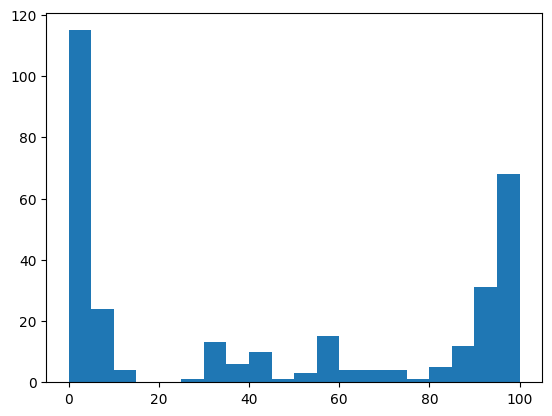

In [93]:
plt.hist(percent_missing.values, bins=20)

In [104]:
np.where(percent_missing.values == 0)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  28,  30,  31,  36,
        39,  40,  43,  44,  46,  47,  50,  51,  52,  53,  58, 216, 219,
       221, 222, 227, 229, 230, 231, 232, 233, 235, 236, 237, 239, 240,
       241, 242, 243, 244, 246, 247, 248, 249, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 272, 273, 274, 275, 278, 279, 280,
       281, 282, 283, 284, 287, 288, 298, 305, 306, 307, 308, 309, 310,
       311, 312, 316, 317], dtype=int64)

In [113]:
null_columns = x_tr.isnull().any()
null_columns = null_columns[null_columns].index
non_null_columns = x_tr.isnull().any()
non_null_columns = non_null_columns[~non_null_columns].index.values

In [128]:
non_null_columns

array(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'MENTHLTH', 'HLTHPLN1', 'PERSDOC2', 'BLOODCHO',
       'CVDSTRK3', 'ASTHMA3', 'CHCOCNCR', 'CHCCOPD1', 'ADDEPEV2',
       'CHCKIDNY', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'EMPLOY1',
       'QSTVER', '_STSTR', '_RAWRAKE', '_WT2RAKE', '_DUALUSE', '_LLCPWT',
       '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_LTASTH1',
       '_CASTHM1', '_ASTHMS1', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE',
       '_RACEG21', '_RACEGR3', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G',
       '_RFBMI5', '_CHLDCNT', '_EDUCAG', '_INCOMG', '_SMOKER3',
       '_RFSMOK3', 'DRNKANY5', 'DROCDY3_', '_RFBING5', '_DRNKWEK',
       '_RFDRHV5', '_MISFRTN', '_MISVEGN', '_FRTRESP', '_VEGRESP',
       '_FRTLT1', '_VEGLT1', '_FRT16', '_VEG23', '_FRUITEX', '_VEGETEX',
       '_TOTINDA', 'MAXVO2_', 'FC60_', 'PAMISS1_', '_PACAT1', '_PAINDX1',
       '_PA150R2', '_PA300R2', '_PA30021', '_PASTRNG', '_PAREC1',
       '_PASTAE1',

In [153]:
test_percentage = 0.7
train_length = int(test_percentage*x_tr.shape[0])
train_index = np.random.choice(a=np.arange(x_tr.shape[0]), size=train_length, replace=False)
test_index  = np.delete(arr=np.arange(x_tr.shape[0]), obj=train_index)

train_index.sort(), test_index.sort()

(None, None)

In [155]:
new_x_tr = x_tr.iloc[train_index]
new_x_te = x_tr.iloc[test_index]
new_y_tr = y_tr.iloc[train_index]
new_y_te = y_tr.iloc[train_index]

In [162]:
x_tr.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=321)

In [61]:
first_training_set = x_tr[non_null_columns.index.values]
first_training_set.corr

<bound method DataFrame.corr of         _STATE  FMONTH     IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0           53      11  11162015      11    16   2015      1100  2015015629   
1           33      12  12152015      12    15   2015      1200  2015004387   
2           20      10  10202015      10    20   2015      1100  2015005638   
3           42       6   6182015       6    18   2015      1100  2015004694   
4           24      11  11062015      11     6   2015      1100  2015004673   
...        ...     ...       ...     ...   ...    ...       ...         ...   
328130      49       7  11232015      11    23   2015      1100  2015006796   
328131      51       5   6082015       6     8   2015      1100  2015006482   
328132      39      10  10202015      10    20   2015      1100  2015004898   
328133      33      12  12302015      12    30   2015      1100  2015004449   
328134      32       9   9122015       9    12   2015      1100  2015001176   

              _PSU 

In [106]:
nan_rows

_STATE      False
FMONTH      False
IDATE       False
IMONTH      False
IDAY        False
            ...  
_RFSEAT2    False
_RFSEAT3    False
_FLSHOT6     True
_PNEUMO2     True
_AIDTST3     True
Length: 321, dtype: bool

In [ ]:
x_tr["CTELENUM"].describe()

count    188720.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: CTELENUM, dtype: float64